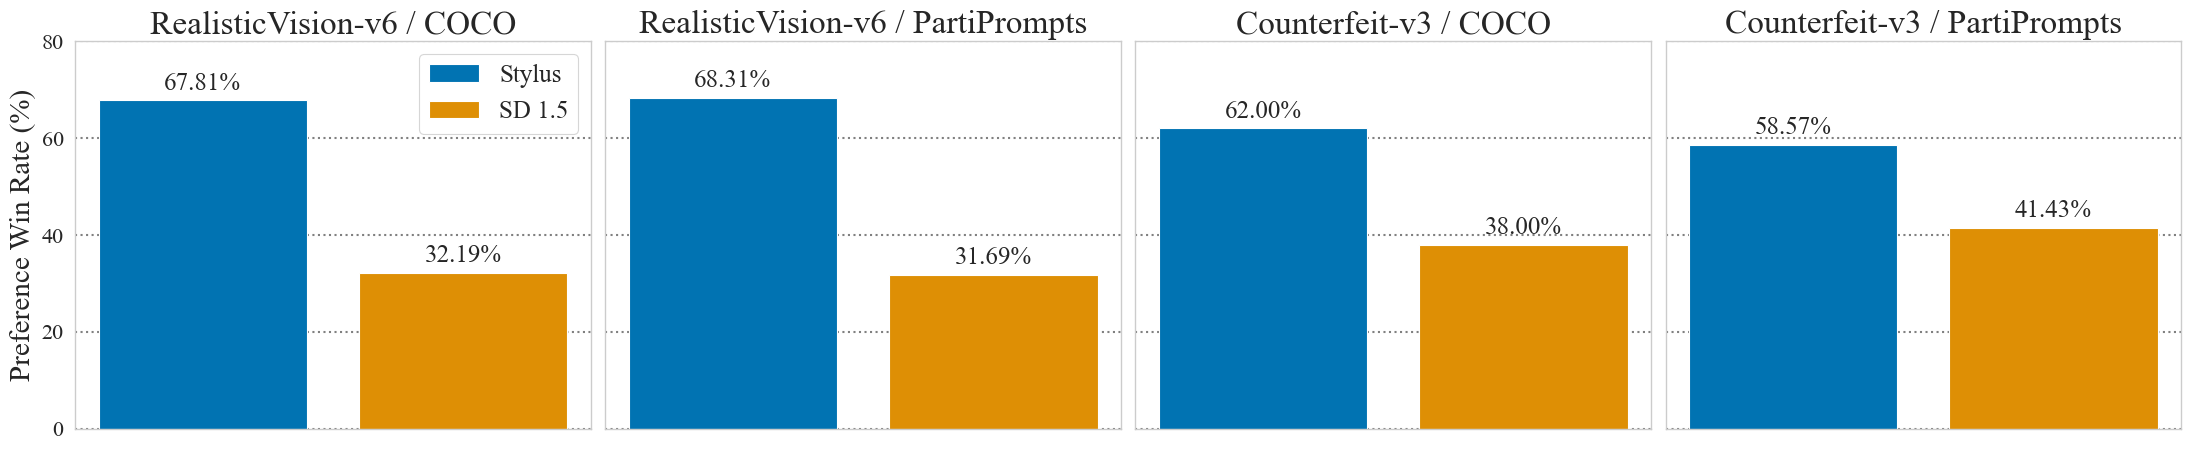

In [2]:
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns


# Data setup
our_method_scores = [99, 97, 93, 82]
checkpoint_scores = [146, 142, 150, 140]

our_method_preference = [100*score / total for score, total in zip(our_method_scores, checkpoint_scores)]
checkpoint_preference = [100*(total - score) / total for score, total in zip(our_method_scores, checkpoint_scores)]

# Set up the bar chart with individual comparison bars side by side
fig, axs = plt.subplots(1, 4, figsize=(22, 5), sharey=True)
plt.rcParams.update({'font.size': 15})

# matplotlib.rc('font', serif='cm10')
matplotlib.rc('mathtext', fontset='cm')
sns.set(style="whitegrid")
plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "Times New Roman"
sns.set_context("paper")
sns.set_palette("colorblind")
color_palette = sns.color_palette("colorblind")

colors = sns.color_palette("colorblind", n_colors=10)


methods = ['RealisticVision-v6 / COCO', 
           'RealisticVision-v6 / PartiPrompts', 'Counterfeit-v3 / COCO', 'Counterfeit-v3 / PartiPrompts']

# Each subplot corresponds to one of the comparison scenarios
for i, ax in enumerate(axs):
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.grid(
        color='grey',
        linestyle='dotted',
        linewidth=1.5,
        axis='y',
    )
    bar1 = ax.bar('Stylus', our_method_preference[i], label='Stylus', color=colors[0],)
    bar2 = ax.bar('SD 1.5', checkpoint_preference[i], label='SD 1.5', color=colors[1])
    # do not show bar ticks
    ax.set_xticks([])
    ax.set_title(methods[i], fontsize=24)
    ax.set_ylabel('Preference Win Rate (%)' if i==0 else "", fontsize=21)
    ax.set_ylim(0, 100)

    ax.text('Stylus', our_method_preference[i] + 1, f'{our_method_preference[i]:.2f}%', ha='center', va='bottom', fontsize=18)
    ax.text('SD 1.5', checkpoint_preference[i] + 1, f'{checkpoint_preference[i]:.2f}%', ha='center', va='bottom', fontsize=18)

    ax.tick_params(axis='y', labelsize=16)
    # set ticks to 0, 20, 40, 60, 80
    ax.set_yticks([0, 20, 40, 60, 80])
    # Make the x-axis labels bigger
    ax.tick_params(axis='x', labelsize=14)
    ax.set_ylim(0, 80)

# Move legend to the first chart top right
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, labels, loc='upper right', fontsize=18)

# Improve layout to accommodate titles and labels better
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('figures/human_eval.pdf', format="pdf", dpi=300, bbox_inches='tight')
plt.show()